In [1]:
%cd /home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1

%load_ext autoreload
%autoreload 2
from evaluation.util import load_eval_results
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("/home/pepijn/Documents/uni/y5/thesis/writing/msc-thesis-figures/std-colors.mplstyle")


/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1


In [33]:

%%capture
merged_results = load_eval_results()
merged_results = merged_results[(merged_results.model_type=='own') & (merged_results.model != 'Hybrid')]
merged_results['eval_type'] = merged_results['eval_type'].str.upper()

2024-03-29 20:51:36.300 | INFO     | src.util:eval_model:482 - Model <class 'src.estimators.MorpheusFI'>, MorpheusFI
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'spa

/tmp/ipykernel_51843/2979690958.py:10: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(
/tmp/ipykernel_51843/2979690958.py:10: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.barplot(


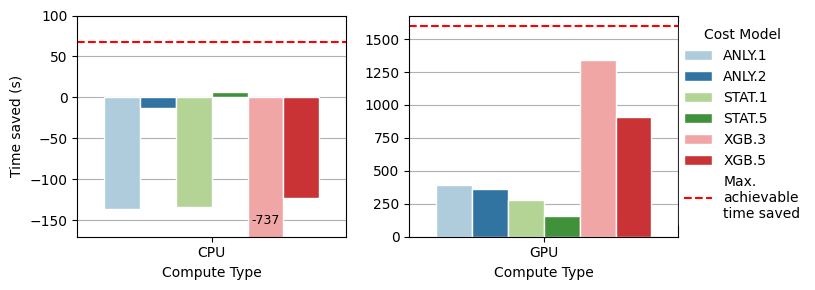

In [59]:
import textwrap
fig, axs = plt.subplots(1, 2, figsize=(0.9 * 8, 3))
plotdf = merged_results[
    # (merged_results.model_type == "own") & 
    (merged_results.eval_type.isin(["CPU", "GPU"]))
].sort_values("eval_type", ascending=False)


for i, (ax, (name, group)) in enumerate(zip(axs, plotdf.groupby("eval_type"))):
    sns.barplot(
        data=group,
        y="y_pred_time_saved",
        x="eval_type",
        hue="model",
        ax=ax,
        palette=sns.color_palette("Paired")
    )

    ax.grid(axis="y")
    ax.set_axisbelow(True)
    # ax.set_ylim(0., 1.)
    ax.set_xlabel("Compute Type")
    # ax.set_ylim(-2.2, 1)
    ax.set_ylabel("Time saved (s)")
    ax.axhline(y=group.y_true_time_saved.max(), color='r', linestyle='--', label="\n".join(textwrap.wrap('Max. achievable time saved', width=10)))

    # Add annotations for negative bars lower than the ylim
    for patch in ax.patches:
        patch.set_edgecolor("white")
        height = patch.get_height()
        if height < -150:
            ax.annotate(f'{height:.0f}', (patch.get_x() + patch.get_width() / 2., -160),
                         ha='center', va='center', xytext=(0, 5.5), textcoords='offset points', fontsize=9)
    
    if i == 1:
        ax.legend(title="Cost Model", ncol=1, loc="upper right", bbox_to_anchor=(1.5, 1.0), edgecolor="white")
        ax.set_ylabel(None)
    else:
        ax.set_ylim(-170, 100)
        ax.get_legend().remove()
fig.subplots_adjust(right=0.3)
fig.tight_layout()
fig.savefig("/home/pepijn/Documents/uni/y5/thesis/writing/overleaf/chapters/05_cost_estimation/figures/compare_gpu_vs_cpu.pdf", bbox_inches="tight")

In [5]:
sns.color_palette(sns.color_palette("Paired")[::2])

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (1.0, 1.0, 0.6)]